In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Compare multiple years of OSM Data

OSM Years to compare: 2014, 2017, 2020, 2022

## Set directories

In [3]:
OUTPUT_DIR = Path("../../../data/04-output/")
OSM_DIR = OUTPUT_DIR / "osm"

OSM_POI_2022 = OSM_DIR / "osm_poi_features_2022.csv"
OSM_POI_2020 = OSM_DIR / "osm_poi_features_2020.csv"
OSM_POI_2017 = OSM_DIR / "osm_poi_features_2017.csv"
OSM_POI_2014 = OSM_DIR / "osm_poi_features_2014.csv"

## Load OSM datasets

In [4]:
drop_cols = ["Unnamed: 0"]

osm_2022 = pd.read_csv(OSM_POI_2022)
osm_2020 = pd.read_csv(OSM_POI_2020)
osm_2017 = pd.read_csv(OSM_POI_2017)
osm_2014 = pd.read_csv(OSM_POI_2014)

for df in [osm_2022, osm_2020, osm_2017, osm_2014]:
    df = df.drop(columns=drop_cols, inplace=True)

In [5]:
# combine them
combined_df = pd.concat([osm_2014, osm_2017, osm_2020, osm_2022])
# combined_df = pd.concat([osm_2022, osm_2020, osm_2017])
combined_df.head(2)

,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,ADM3_EN,ADM3_PCODE,ADM4_EN,ADM4_PCODE,osm_year,poi_count,...,osm_poi_toilet_count,osm_poi_toilet_nearest,osm_poi_recycling_count,osm_poi_recycling_nearest,osm_poi_waste_basket_count,osm_poi_waste_basket_nearest,osm_poi_wastewater_plant_count,osm_poi_wastewater_plant_nearest,osm_poi_waste_transfer_station_count,osm_poi_waste_transfer_station_nearest
0,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Lomboy,PH015518016,2014,0.0,...,0.0,9668.100164,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
1,Region I,PH010000000,Pangasinan,PH015500000,Dagupan City,PH015518000,Tapuac,PH015518031,2014,17.0,...,0.0,10000.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0


In [6]:
combined_df.shape

(3516, 126)

## Check POI counts across the years

In [13]:
# get the count columns
count_cols = [col for col in combined_df.columns.tolist() if "_count" in col]

pd.set_option("display.max_columns", None)
# group by year
grouped = combined_df.groupby("osm_year")[count_cols].sum()
grouped

,poi_count,osm_poi_clinic_count,osm_poi_dentist_count,osm_poi_doctors_count,osm_poi_hospital_count,osm_poi_optician_count,osm_poi_pharmacy_count,osm_poi_atm_count,osm_poi_bank_count,osm_poi_college_count,osm_poi_community_centre_count,osm_poi_comms_tower_count,osm_poi_convenience_count,osm_poi_fire_station_count,osm_poi_kindergarten_count,osm_poi_lighthouse_count,osm_poi_market_place_count,osm_poi_park_count,osm_poi_public_building_count,osm_poi_police_count,osm_poi_school_count,osm_poi_shelter_count,osm_poi_supermarket_count,osm_poi_telephone_count,osm_poi_tower_count,osm_poi_town_hall_count,osm_poi_university_count,osm_poi_cable_count,osm_poi_compensator_count,osm_poi_connection_count,osm_poi_converter_count,osm_poi_generator_count,osm_poi_insulator_count,osm_poi_line_count,osm_poi_busbar_count,osm_poi_bay_count,osm_poi_minor_line_count,osm_poi_plant_count,osm_poi_pole_count,osm_poi_portal_count,osm_poi_substation_count,osm_poi_tower_count_y,osm_poi_transformer_count,osm_poi_exchange_count,osm_poi_connection_point_count,osm_poi_distribution_point_count,osm_poi_service_device_count,osm_poi_data_center_count,osm_poi_drinking_water_count,osm_poi_water_mill_count,osm_poi_water_tower_count,osm_poi_water_works_count,osm_poi_water_well_count,osm_poi_sanitary_dump_station_count,osm_poi_toilet_count,osm_poi_recycling_count,osm_poi_waste_basket_count,osm_poi_wastewater_plant_count,osm_poi_waste_transfer_station_count
osm_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,5207.0,0.0,6.0,51.0,88.0,4.0,202.0,53.0,501.0,50.0,19.0,8.0,201.0,35.0,105.0,0.0,0.0,13.0,171.0,90.0,436.0,20.0,116.0,12.0,36.0,150.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,19.0,0.0,1.0,0.0,30.0,1.0,4.0,0.0,0.0
2017,8152.0,0.0,38.0,51.0,55.0,15.0,366.0,174.0,699.0,52.0,36.0,12.0,523.0,36.0,112.0,1.0,0.0,15.0,132.0,107.0,463.0,42.0,162.0,9.0,16.0,120.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,32.0,0.0,9.0,0.0,63.0,3.0,4.0,1.0,0.0
2020,10979.0,0.0,62.0,52.0,42.0,18.0,470.0,235.0,782.0,126.0,76.0,21.0,950.0,41.0,106.0,5.0,0.0,23.0,47.0,124.0,495.0,91.0,197.0,10.0,15.0,124.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,56.0,3.0,22.0,0.0,85.0,8.0,5.0,1.0,0.0
2022,11222.0,0.0,78.0,83.0,18.0,23.0,517.0,274.0,793.0,78.0,64.0,53.0,1047.0,39.0,104.0,5.0,22.0,13.0,30.0,121.0,264.0,85.0,205.0,7.0,11.0,116.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,60.0,5.0,43.0,0.0,90.0,46.0,4.0,1.0,0.0


## Visualize POI count distributions

In [8]:
# Create a distribution plot (histogram) using Seaborn

year_palette = sns.color_palette("husl", n_colors=len(combined_df["osm_year"].unique()))


def compare_feature(feature, df=combined_df, bins=20, lim_ax=False, xmax=0):
    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(
        data=df, x=feature, hue="osm_year", kde=True, bins=bins, palette=year_palette
    )

    osm_years = df["osm_year"].unique()
    legend_labels = [str(year) for year in osm_years]

    if lim_ax:
        ax.set_xlim(0, xmax)

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature} by OSM Year")

    # Show the plot
    plt.legend(title="OSM Year", labels=legend_labels)
    plt.show()

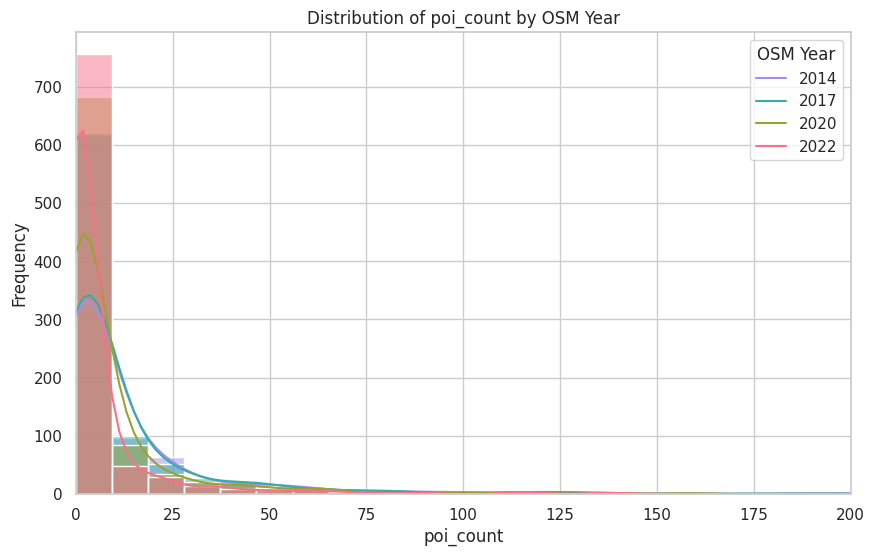

In [9]:
compare_feature("poi_count", bins=40, lim_ax=True, xmax=200)

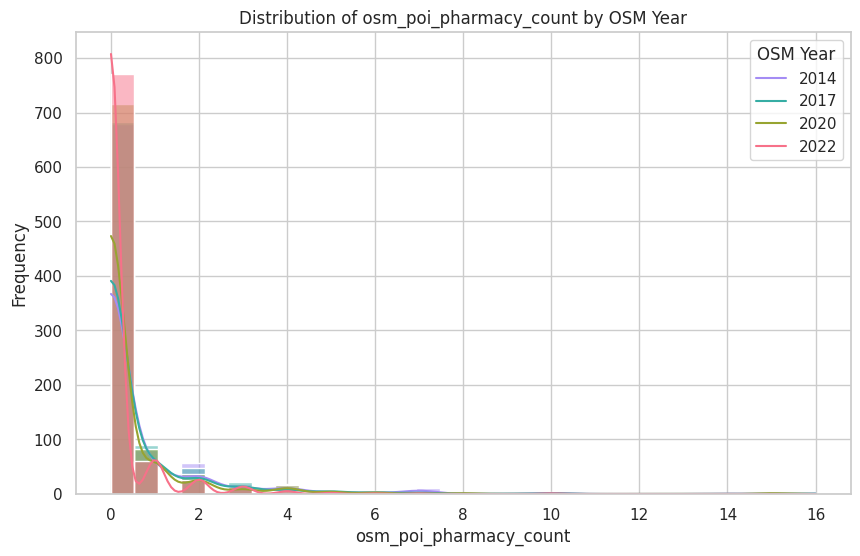

In [12]:
compare_feature("osm_poi_pharmacy_count", bins=30)

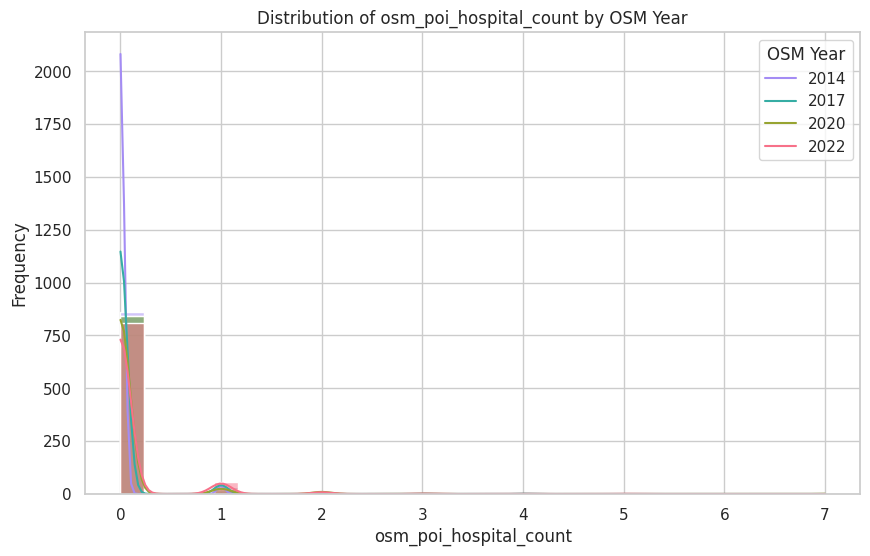

In [69]:
compare_feature("osm_poi_hospital_count", bins=30)

In [51]:
combined_df.shape

(3516, 126)

In [60]:
# experiment to remove the zeroes
sorted_df = combined_df.sort_values(by="poi_count", ascending=False)
sorted_df

,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,ADM3_EN,ADM3_PCODE,ADM4_EN,ADM4_PCODE,osm_year,poi_count,...,osm_poi_toilet_count,osm_poi_toilet_nearest,osm_poi_recycling_count,osm_poi_recycling_nearest,osm_poi_waste_basket_count,osm_poi_waste_basket_nearest,osm_poi_wastewater_plant_count,osm_poi_wastewater_plant_nearest,osm_poi_waste_transfer_station_count,osm_poi_waste_transfer_station_nearest
137,National Capital Region,PH130000000,"NCR, Fourth District",PH137600000,City of Muntinlupa,PH137603000,Alabang,PH137603001,2022,373.0,...,13.0,0.000000,0.0,3534.852780,0.0,10000.000000,0.0,10000.000000,0.0,10000.0
137,National Capital Region,PH130000000,"NCR, Fourth District",PH137600000,City of Muntinlupa,PH137603000,Alabang,PH137603001,2020,356.0,...,13.0,0.000000,0.0,5545.119778,0.0,7142.877655,0.0,10000.000000,0.0,10000.0
137,National Capital Region,PH130000000,"NCR, Fourth District",PH137600000,City of Muntinlupa,PH137603000,Alabang,PH137603001,2017,263.0,...,11.0,0.000000,0.0,10000.000000,0.0,7142.877655,0.0,10000.000000,0.0,10000.0
265,National Capital Region,PH130000000,"NCR, Second District",PH137400000,City of Mandaluyong,PH137401000,Highway Hills,PH137401013,2022,202.0,...,0.0,499.731170,0.0,141.063412,0.0,2397.074322,0.0,6342.812598,0.0,10000.0
441,National Capital Region,PH130000000,"NCR, Fourth District",PH137600000,City of Muntinlupa,PH137603000,New Alabang Village,PH137603009,2020,198.0,...,0.0,874.909269,0.0,5922.693066,0.0,3790.053245,0.0,10000.000000,0.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Region X,PH100000000,Misamis Oriental,PH104300000,Cagayan de Oro City,PH104305000,F. S. Catanico,PH104305048,2017,0.0,...,0.0,2710.337352,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000,0.0,10000.0
538,Region IX,PH090000000,Zamboanga del Sur,PH097300000,Zamboanga City,PH097332000,Tolosa,PH097332091,2017,0.0,...,0.0,5887.719473,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000,0.0,10000.0
530,Region IX,PH090000000,Zamboanga del Sur,PH097300000,Zamboanga City,PH097332000,Lunzuran,PH097332045,2017,0.0,...,0.0,920.242628,0.0,10000.000000,0.0,10000.000000,0.0,3821.022659,0.0,10000.0
529,Region IX,PH090000000,Zamboanga del Sur,PH097300000,Zamboanga City,PH097332000,Pasilmanta (Sacol Island),PH097332058,2017,0.0,...,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000,0.0,10000.0


In [83]:
group_region = combined_df.groupby(["ADM1_EN"])["ADM3_EN"].value_counts()
group_region

ADM1_EN                  ADM3_EN            
National Capital Region  City of Mandaluyong    108
                         City of Navotas         56
                         City of Muntinlupa      36
Region I                 Dagupan City           124
Region III               Palayan City            76
Region IX                Zamboanga City         404
Region V                 Legazpi City           280
Region VI                Iloilo City            720
Region VII               Mandaue City           108
Region VIII              Tacloban City          552
Region X                 Cagayan de Oro City    320
Region XI                Davao City             732
Name: ADM3_EN, dtype: int64

In [76]:
# city sample_dfs
ncr = combined_df[combined_df["ADM1_EN"] == "National Capital Region"]
davao = combined_df[combined_df["ADM3_EN"] == "Davao City"]
dagupan = combined_df[combined_df["ADM3_EN"] == "Dagupan City"]
iloilo = combined_df[combined_df["ADM3_EN"] == "Iloilo City"]

In [ ]:
group_region_dfs = combined_df.groupby(["ADM1_EN"])

for region, group in group_region_dfs:
    print(region)
    compare_feature(
        "poi_count",
        df=group,
        bins=20,
    )